In [1]:
!pip install opencv-python
!pip install gtts
!pip install pydot

In [2]:
import os 
os.getcwd() # current working directory

'C:\\Users\\suhas\\Desktop\\i2s'

In [3]:
import numpy as np
import pandas as pd
import cv2
from glob import glob
from pickle import dump

In [4]:
#saving all images in "images" variable
images_path = 'Images'
images = glob(images_path+'/*.jpg')
len(images)

8091

In [5]:
images[:5]

['Images\\1000268201_693b08cb0e.jpg',
 'Images\\1001773457_577c3a7d70.jpg',
 'Images\\1002674143_1b742ab4b8.jpg',
 'Images\\1003163366_44323f5815.jpg',
 'Images\\1007129816_e794419615.jpg']

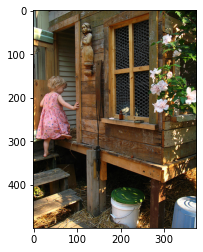

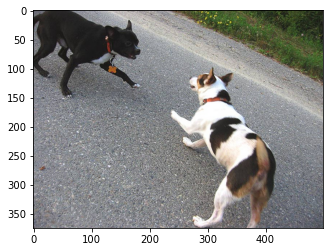

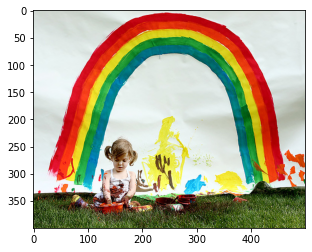

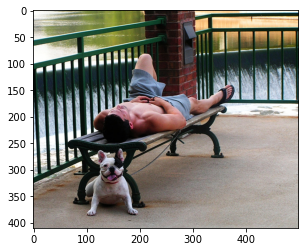

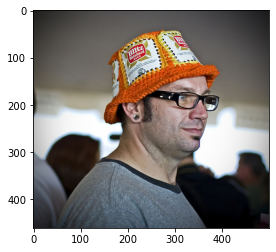

In [6]:
#printing images
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [7]:
#importing the pretarined model "resnet50"
from tensorflow.keras.applications import ResNet50
incept_model = ResNet50(include_top=True)

In [8]:
#selecting last 2nd layer of resnet50 for our feature selection model
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [ ]:
# extracting features of 1500 images using resnet50 
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400


In [10]:
print("No of images used to extract features ::",len(images_features))
print("Image Features ::::::")
images_features

No of images used to extract features :: 1500
Image Features ::::::


{'Images\\1000268201_693b08cb0e.jpg': array([0.16725852, 0.46361926, 0.00352356, ..., 0.11895251, 0.4263413 ,
        1.3225994 ], dtype=float32),
 'Images\\1001773457_577c3a7d70.jpg': array([1.4409866 , 1.043546  , 0.23661026, ..., 0.39719468, 0.04307788,
        0.30509183], dtype=float32),
 'Images\\1002674143_1b742ab4b8.jpg': array([1.5449812e+00, 9.8683006e-01, 1.1314178e-04, ..., 0.0000000e+00,
        1.1347512e+00, 4.7488478e-01], dtype=float32),
 'Images\\1003163366_44323f5815.jpg': array([0.9030611 , 0.11390921, 0.74887115, ..., 0.33106774, 0.        ,
        0.        ], dtype=float32),
 'Images\\1007129816_e794419615.jpg': array([0.33239824, 2.286729  , 0.        , ..., 0.20395713, 0.        ,
        0.25451937], dtype=float32),
 'Images\\1007320043_627395c3d8.jpg': array([1.6907164 , 0.7195159 , 0.09514083, ..., 0.        , 0.24099395,
        0.0030701 ], dtype=float32),
 'Images\\1009434119_febe49276a.jpg': array([0.40478376, 0.33644983, 0.4330247 , ..., 0.36723483, 0.

In [11]:
# save the features to file
dump(images_features, open('features.pkl', 'wb'))

In [12]:
#path for image captions
caption_path = 'Flickr_TextData/Flickr8k.token.txt'

In [13]:
# saving captions in a variable "caption"
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [14]:
#example of saved captions
print("Captions ::")
captions[:10]

Captions ::


['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .']

In [15]:
#total Loength of captions of all the images
len(captions)

40461

In [16]:
#saving captions of those images whose features we extracted
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        for k,v in images_features.items():
            if img_name in k:
                if img_name not in captions_dict:
                    captions_dict[img_name] = [caption]  
                else:
                    captions_dict[img_name].append(caption)
            
    except:
        pass

In [17]:
# Ex: Checking the five Captions of the image.
captions_dict['1001773457_577c3a7d70.jpg']

['A black dog and a spotted dog are fighting',
 'A black dog and a tri-colored dog playing with each other on the road .',
 'A black dog and a white dog with brown spots are staring at each other in the street .',
 'Two dogs of different breeds looking at each other on the road .',
 'Two dogs on pavement moving toward each other .']

In [18]:
# Total length of dictionary
print(len(captions_dict))

1500


In [19]:
i=0
for k,v in captions_dict.items():
    if i<=5:
        print(k,v)
        i+=1
    else:
        break

1000268201_693b08cb0e.jpg ['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .']
1001773457_577c3a7d70.jpg ['A black dog and a spotted dog are fighting', 'A black dog and a tri-colored dog playing with each other on the road .', 'A black dog and a white dog with brown spots are staring at each other in the street .', 'Two dogs of different breeds looking at each other on the road .', 'Two dogs on pavement moving toward each other .']
1002674143_1b742ab4b8.jpg ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .', 'A little girl is sitting in front of a large painted rainbow .', 'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .', 'There is a girl with pigtails sitting

In [20]:
import string

# prepare translation table for removing punctuation
table = str.maketrans('', '', string.punctuation)
for key, desc_list in captions_dict.items():
	for i in range(len(desc_list)):
		desc = desc_list[i]
		# tokenize
		desc = desc.split()
		# convert to lower case
		desc = [word.lower() for word in desc]
		# remove punctuation from each token
		desc = [w.translate(table) for w in desc]
		# remove hanging 's' and 'a'
		desc = [word for word in desc if len(word)>1]
		# remove tokens with numbers in them
		desc = [word for word in desc if word.isalpha()]
		# store as string
		desc_list[i] =  ' '.join(desc)

In [21]:
i=0
for k,v in captions_dict.items():
    if i<=5:
        print(k,v)
        i+=1
    else:
        break

1000268201_693b08cb0e.jpg ['child in pink dress is climbing up set of stairs in an entry way', 'girl going into wooden building', 'little girl climbing into wooden playhouse', 'little girl climbing the stairs to her playhouse', 'little girl in pink dress going into wooden cabin']
1001773457_577c3a7d70.jpg ['black dog and spotted dog are fighting', 'black dog and tricolored dog playing with each other on the road', 'black dog and white dog with brown spots are staring at each other in the street', 'two dogs of different breeds looking at each other on the road', 'two dogs on pavement moving toward each other']
1002674143_1b742ab4b8.jpg ['little girl covered in paint sits in front of painted rainbow with her hands in bowl', 'little girl is sitting in front of large painted rainbow', 'small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it', 'there is girl with pigtails sitting in front of rainbow painting', 'young girl with pigtails painting outside in

In [22]:
clean_caps = captions_dict.copy

In [23]:
#saving the clean discriptions
lines = list()
for key, desc_list in captions_dict.items():
	for desc in desc_list:
		lines.append(key + ' ' + desc)
data = '\n'.join(lines)
file = open('clean_descriptions.txt', 'w')
file.write(data)
file.close()

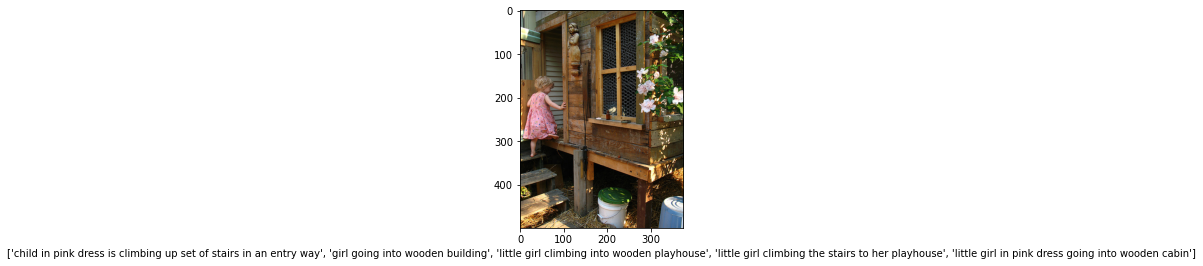

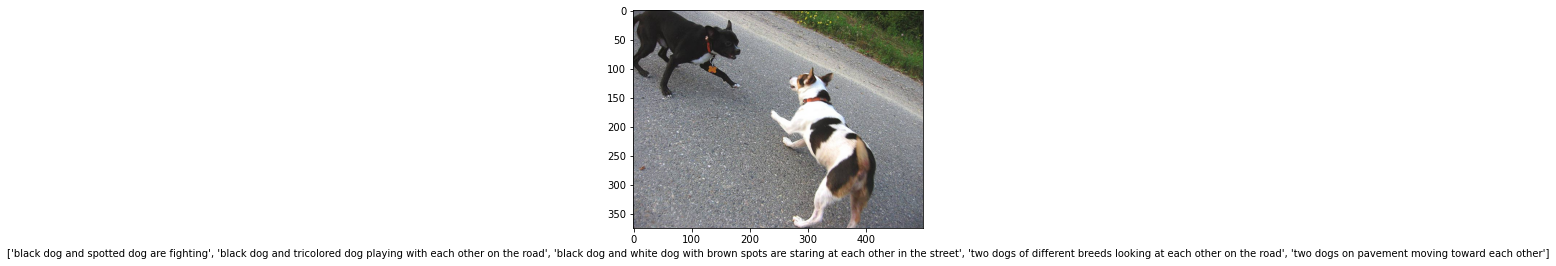

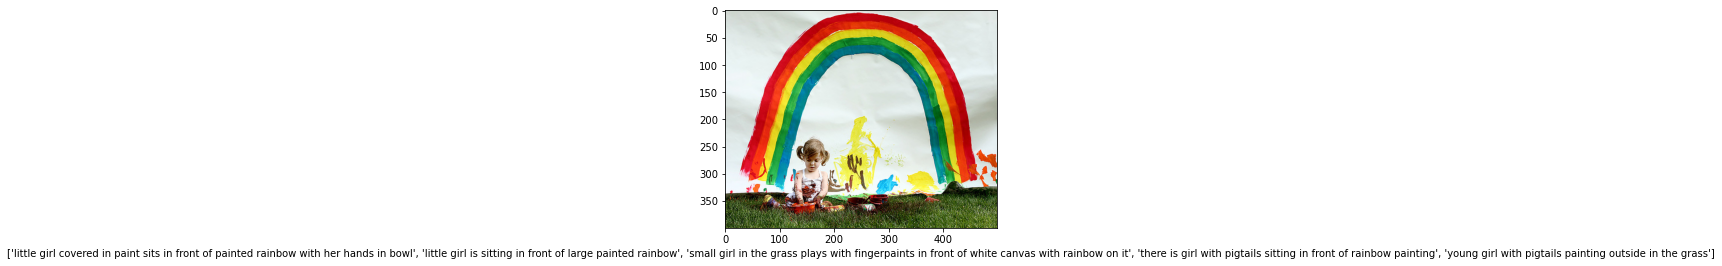

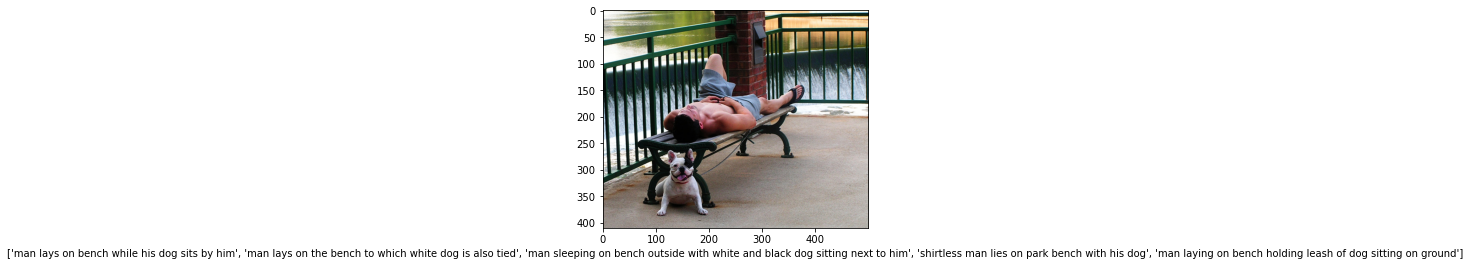

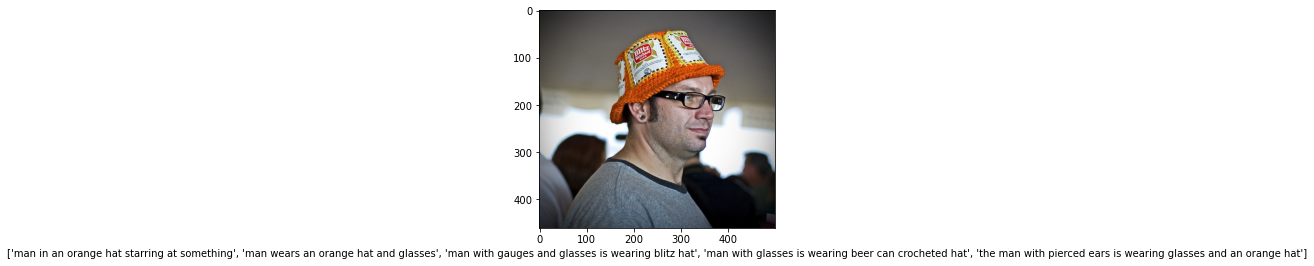

In [24]:
#printing images with their respective captions
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2=images[i][7:]
    plt.xlabel(captions_dict[img2])
    plt.imshow(img)

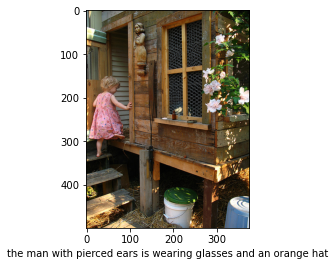

In [25]:
# no need of this code
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    img_name = k
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2=images[i][7:]
    plt.xlabel(captions_dict[img2][-1])
    plt.imshow(img)
    break

In [26]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:
                count_words[word] = 1
            else:
                count_words[word] += 1

In [27]:
len(count_words)
word_count=count_words.copy()
word_count

{'child': 339,
 'in': 3469,
 'pink': 154,
 'dress': 62,
 'is': 1801,
 'climbing': 152,
 'up': 282,
 'set': 16,
 'of': 1225,
 'stairs': 14,
 'an': 455,
 'entry': 1,
 'way': 21,
 'girl': 711,
 'going': 24,
 'into': 258,
 'wooden': 58,
 'building': 69,
 'little': 418,
 'playhouse': 2,
 'the': 3460,
 'to': 656,
 'her': 239,
 'cabin': 2,
 'black': 749,
 'dog': 1708,
 'and': 1649,
 'spotted': 8,
 'are': 581,
 'fighting': 18,
 'tricolored': 6,
 'playing': 366,
 'with': 1498,
 'each': 76,
 'other': 138,
 'on': 2056,
 'road': 79,
 'white': 675,
 'brown': 510,
 'spots': 5,
 'staring': 11,
 'at': 582,
 'street': 162,
 'two': 1006,
 'dogs': 429,
 'different': 7,
 'breeds': 4,
 'looking': 163,
 'pavement': 10,
 'moving': 7,
 'toward': 23,
 'covered': 73,
 'paint': 4,
 'sits': 130,
 'front': 262,
 'painted': 14,
 'rainbow': 7,
 'hands': 47,
 'bowl': 4,
 'sitting': 250,
 'large': 241,
 'small': 278,
 'grass': 318,
 'plays': 117,
 'fingerpaints': 1,
 'canvas': 4,
 'it': 81,
 'there': 60,
 'pigtails': 

In [28]:
count = list(word_count.values())
words= list(word_count.keys())

In [29]:
df=pd.DataFrame(list(zip(words,count)), columns=('words','count'))
df

words  count
0           child    339
1              in   3469
2            pink    154
3           dress     62
4              is   1801
...           ...    ...
3941        whild      1
3942       flight      1
3943        sails      1
3944  rectangular      1
3945         sell      1

[3946 rows x 2 columns]

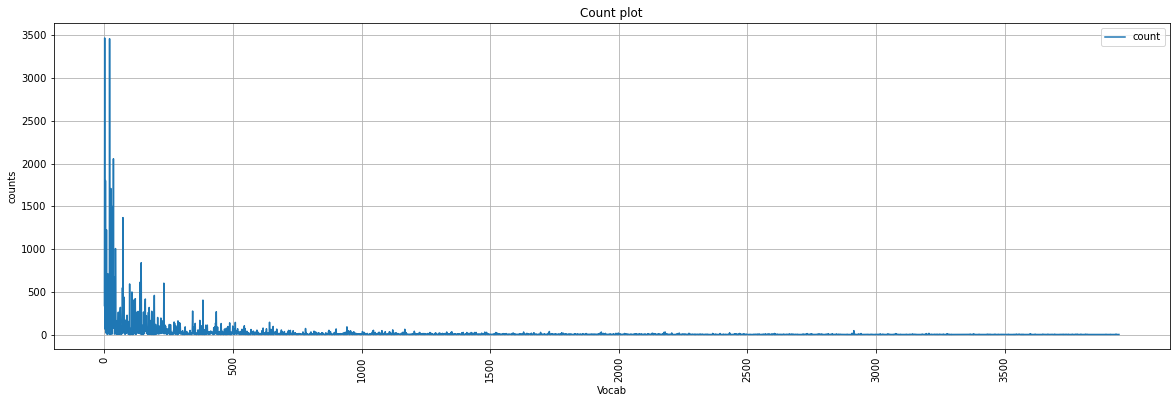

In [30]:
#words with a frequency of more than 10.
df.plot(grid=True,figsize=(20,6))
plt.title('Count plot')
plt.xlabel('Vocab')
plt.xticks(np.arange(0,4000,500),rotation=90)
plt.ylabel('counts')
plt.show()

Text(0.5, 1.0, 'plot of count vs words')

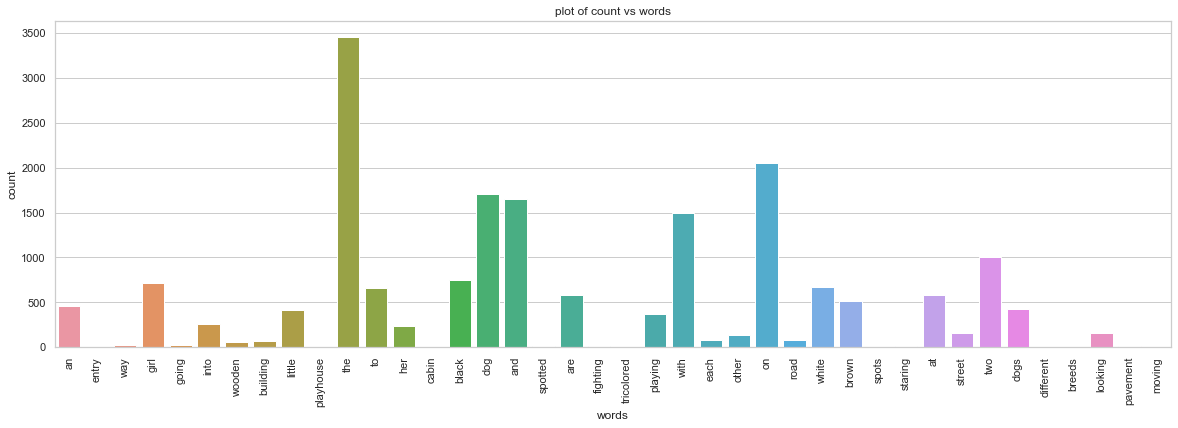

In [31]:
#The distribution of top 50 words
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(20,6))
sns.barplot(x='words',y='count',data=df[10:50])
plt.xticks(rotation='vertical')
plt.title('plot of count vs words')

Text(0.5, 1.0, 'plot of count vs words')

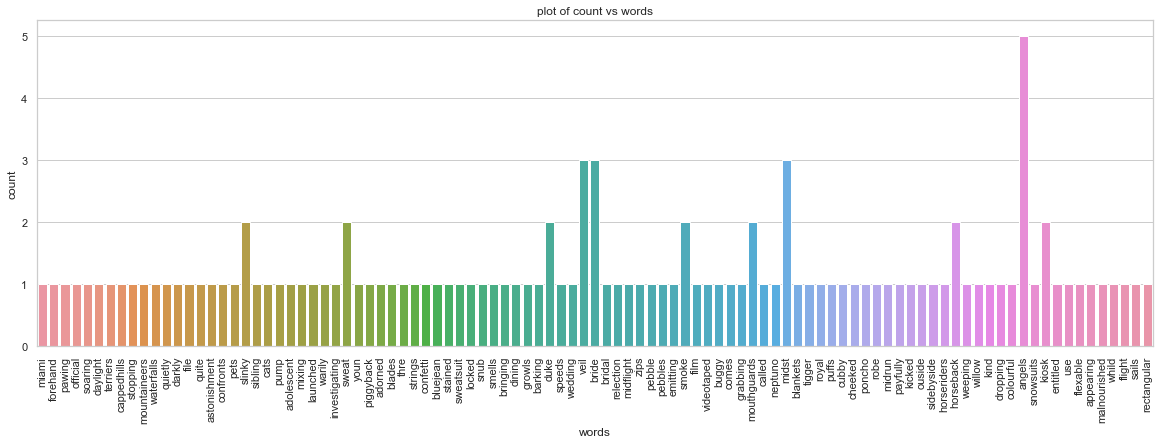

In [32]:
#the distribution of the least frequent word we removed earlier
sns.set(style='whitegrid')
plt.figure(figsize=(20,6))
sns.barplot(x='words',y='count',data=df[-100:-1])
plt.xticks(rotation='vertical')
plt.title('plot of count vs words')

In [33]:
# addind startseq and endseq

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)
captions_dict['1003163366_44323f5815.jpg']

['startofseq man lays on bench while his dog sits by him endofseq',
 'startofseq man lays on the bench to which white dog is also tied endofseq',
 'startofseq man sleeping on bench outside with white and black dog sitting next to him endofseq',
 'startofseq shirtless man lies on park bench with his dog endofseq',
 'startofseq man laying on bench holding leash of dog sitting on ground endofseq']

In [34]:
#creating a key value pair (key=word, value=no of times it appeard)
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [35]:
print(len(new_dict))
new_dict

3946


{'child': 1,
 'in': 2,
 'pink': 3,
 'dress': 4,
 'is': 5,
 'climbing': 6,
 'up': 7,
 'set': 8,
 'of': 9,
 'stairs': 10,
 'an': 11,
 'entry': 12,
 'way': 13,
 'girl': 14,
 'going': 15,
 'into': 16,
 'wooden': 17,
 'building': 18,
 'little': 19,
 'playhouse': 20,
 'the': 21,
 'to': 22,
 'her': 23,
 'cabin': 24,
 'black': 25,
 'dog': 26,
 'and': 27,
 'spotted': 28,
 'are': 29,
 'fighting': 30,
 'tricolored': 31,
 'playing': 32,
 'with': 33,
 'each': 34,
 'other': 35,
 'on': 36,
 'road': 37,
 'white': 38,
 'brown': 39,
 'spots': 40,
 'staring': 41,
 'at': 42,
 'street': 43,
 'two': 44,
 'dogs': 45,
 'different': 46,
 'breeds': 47,
 'looking': 48,
 'pavement': 49,
 'moving': 50,
 'toward': 51,
 'covered': 52,
 'paint': 53,
 'sits': 54,
 'front': 55,
 'painted': 56,
 'rainbow': 57,
 'hands': 58,
 'bowl': 59,
 'sitting': 60,
 'large': 61,
 'small': 62,
 'grass': 63,
 'plays': 64,
 'fingerpaints': 65,
 'canvas': 66,
 'it': 67,
 'there': 68,
 'pigtails': 69,
 'painting': 70,
 'young': 71,
 'out

In [36]:
new_dict['<OUT>'] = len(new_dict) 

In [37]:
len(new_dict)

3947

In [38]:
captions_backup = captions_dict.copy()

In [39]:
captions_dict = captions_backup.copy()

In [40]:
captions_backup

{'1000268201_693b08cb0e.jpg': ['startofseq child in pink dress is climbing up set of stairs in an entry way endofseq',
  'startofseq girl going into wooden building endofseq',
  'startofseq little girl climbing into wooden playhouse endofseq',
  'startofseq little girl climbing the stairs to her playhouse endofseq',
  'startofseq little girl in pink dress going into wooden cabin endofseq'],
 '1001773457_577c3a7d70.jpg': ['startofseq black dog and spotted dog are fighting endofseq',
  'startofseq black dog and tricolored dog playing with each other on the road endofseq',
  'startofseq black dog and white dog with brown spots are staring at each other in the street endofseq',
  'startofseq two dogs of different breeds looking at each other on the road endofseq',
  'startofseq two dogs on pavement moving toward each other endofseq'],
 '1002674143_1b742ab4b8.jpg': ['startofseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endofseq',
  'startofseq litt

In [41]:
#encoding the captions
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])

        captions_dict[k][vv.index(v)] = encoded

In [42]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[3946,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   2,
   11,
   12,
   13,
   3946],
  [3946, 14, 15, 16, 17, 18, 3946],
  [3946, 19, 14, 6, 16, 17, 20, 3946],
  [3946, 19, 14, 6, 21, 10, 22, 23, 20, 3946],
  [3946, 19, 14, 2, 3, 4, 15, 16, 17, 24, 3946]],
 '1001773457_577c3a7d70.jpg': [[3946, 25, 26, 27, 28, 26, 29, 30, 3946],
  [3946, 25, 26, 27, 31, 26, 32, 33, 34, 35, 36, 21, 37, 3946],
  [3946, 25, 26, 27, 38, 26, 33, 39, 40, 29, 41, 42, 34, 35, 2, 21, 43, 3946],
  [3946, 44, 45, 9, 46, 47, 48, 42, 34, 35, 36, 21, 37, 3946],
  [3946, 44, 45, 36, 49, 50, 51, 34, 35, 3946]],
 '1002674143_1b742ab4b8.jpg': [[3946,
   19,
   14,
   52,
   2,
   53,
   54,
   2,
   55,
   9,
   56,
   57,
   33,
   23,
   58,
   2,
   59,
   3946],
  [3946, 19, 14, 5, 60, 2, 55, 9, 61, 56, 57, 3946],
  [3946,
   62,
   14,
   2,
   21,
   63,
   64,
   33,
   65,
   2,
   55,
   9,
   38,
   66,
   33,
   57,
   36,
   67,
   3946],
  [3946, 68, 5, 14, 

In [43]:
# finding maximum lenth of caption
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)
            
print("maximum length of the caption :: ",MAX_LEN)

[3946, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 11, 12, 13, 3946]
[3946, 25, 26, 27, 38, 26, 33, 39, 40, 29, 41, 42, 34, 35, 2, 21, 43, 3946]
[3946, 62, 14, 2, 21, 63, 64, 33, 65, 2, 55, 9, 38, 66, 33, 57, 36, 67, 3946]
[3946, 158, 144, 2, 38, 159, 27, 160, 161, 2, 55, 9, 162, 147, 33, 73, 2, 149, 157, 79, 3946]
[3946, 73, 5, 89, 21, 242, 9, 232, 7, 22, 77, 221, 2, 55, 9, 395, 335, 76, 183, 73, 187, 36, 3946]
[3946, 73, 2, 139, 559, 19, 144, 7, 2, 21, 225, 27, 583, 190, 79, 22, 584, 384, 585, 293, 102, 214, 79, 3946]
[3946, 21, 14, 2, 21, 650, 580, 651, 5, 140, 84, 22, 44, 71, 195, 142, 5, 99, 25, 652, 27, 21, 35, 5, 653, 654, 3946]
[3946, 68, 29, 344, 71, 195, 142, 555, 894, 89, 895, 896, 142, 33, 130, 897, 874, 27, 839, 2, 23, 221, 27, 142, 33, 898, 468, 3946]
[3946, 14, 2, 108, 27, 25, 1470, 33, 38, 1253, 5, 140, 84, 22, 73, 2, 880, 27, 14, 2, 540, 3, 27, 25, 27, 38, 1471, 652, 3946]
[3946, 232, 2, 11, 92, 689, 27, 161, 5, 1426, 36, 162, 147, 76, 467, 232, 2, 108, 287, 136, 84, 22, 23, 36,

In [77]:
#padding and categorising the captions 
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    photo1=photo
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                print(k)
                a=photo['Images\\'+k]
                X.append(a)
            
                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

def generator1(photo, caption):
    n_samples = 0
    photo1=photo
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                print(k)
                a=photo['Images\\'+k]
                X.append(a)
            
                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

test_data = dict(list(images_features.items())[:1200]) #{k[:1000] images_features[k] for k in images_features}
test_data_cap = dict(list(captions_dict.items())[:1200])

val_data = dict(list(images_features.items())[1200:1500]) #{k[:1000] images_features[k] for k in images_features}
val_data_cap = dict(list(captions_dict.items())[1200:1500])

X, y_in, y_out = generator(test_data, test_data_cap)
X_val, y_in_val, y_out_val =  generator(val_data, val_data_cap)

1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_6

1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_d

102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
102351840_323e3de834.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f1fefbdce1.jpg
1024138940_f

1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4a598ed535.jpg
1032460886_4

1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056249424_ef2a2e041c.jpg
1056338697_4f7d7ce270.jpg
1056338697_4f7d7ce270.jpg
1056338697_4f7d7ce270.jpg
1056338697_4

1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f3cc97239b.jpg
1067790824_f

1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1077931201_1e0bb83105.jpg
1079274291_9aaf896cc1.jpg
1079274291_9aaf896cc1.jpg
1079274291_9aaf896cc1.jpg
1079274291_9aaf896cc1.jpg
1079274291_9

1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2acee738cf.jpg
1088767354_2

1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093716555_801aacef79.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b313cd49ff.jpg
1093737381_b

1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
1096395242_fc69f0ae5a.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
109671650_f7bbc297fa.jpg
10967

1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
1105959054_9c3a738096.jpg
110595925_f3395c8bd6.jpg
110595925_f33

1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115565519_d976d4b1f1.jpg
1115679311_245eff2f4b.jpg
1115679311_2

1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
1121416483_c7902d0d49.jpg
112178718_87270d9b4d.jpg
112178718_87270d9b4d.jpg
112178718_87270d9b4d.jpg
112178718_87270

1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d80a1aa59c.jpg
1130369873_d

1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_600610c5df.jpg
1132772170_6

1142283988_6b227c5231.jpg
1142283988_6b227c5231.jpg
1142283988_6b227c5231.jpg
1142283988_6b227c5231.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2a0c1c2551.jpg
1142847777_2

115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg
115684808_cb01227802.jpg


1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8caab45e15.jpg
1167908324_8

1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4f5aaed773.jpg
1189977786_4

1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
1215334959_b1970965f7.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
121800200_bef08fae5f.jpg
1218002

1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235580648_7eebaed9bc.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_819231767a.jpg
1235681222_8

1244306891_8e78ae1620.jpg
1244306891_8e78ae1620.jpg
1244306891_8e78ae1620.jpg
1244306891_8e78ae1620.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_822e6efe60.jpg
1244485675_8

1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252396628_eb81d3905b.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4b08625897.jpg
1252787177_4

1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_653f1469a9.jpg
1262583859_6

1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_06478dd457.jpg
1277185009_0

1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2dee85f1a5.jpg
1287475186_2

1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
1295698260_e10c53c137.jpg
129599450_cab4e77343.jpg
129599450_cab4e77343.jpg
129599450_cab4e77343.jpg
129599450_cab4e77343.jpg
129599450_cab4e77343.jpg
129599450_cab4e77343.jpg
129599450_cab4e77343.jpg
129599450_cab4e77343.jpg
129599450_cab4e77343.jpg
129599450_cab4e77343.

1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_47de590273.jpg
1303548017_4

1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1309330801_aeeb23f1ee.jpg
1311132744_5ffd03f831.jpg
1311132744_5ffd03f831.jpg
1311132744_5

1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9d4c78b8af.jpg
1321723162_9

1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332492622_8c66992b62.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1e3de8ae70.jpg
1332722096_1

1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342766791_1e72f92455.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_bacc32344d.jpg
1342780478_b

1348947380_14f0fc1237.jpg
1348947380_14f0fc1237.jpg
1348947380_14f0fc1237.jpg
1348947380_14f0fc1237.jpg
1348947380_14f0fc1237.jpg
1348947380_14f0fc1237.jpg
1348947380_14f0fc1237.jpg
1348947380_14f0fc1237.jpg
1348947380_14f0fc1237.jpg
1348947380_14f0fc1237.jpg
1348947380_14f0fc1237.jpg
1348947380_14f0fc1237.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c

1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c0675b0706.jpg
1355450069_c

1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_976e3d2e30.jpg
1358089136_9

136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg
136644885_f7d2bbf546.jpg


1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1383840121_c092110917.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4022a7520c.jpg
1384292980_4

1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388373425_3c72b56639.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_162edcceb4.jpg
1388970365_1

1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_bf708cc501.jpg
1394620454_b

1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1401961581_76921a75c5.jpg
1402640441_81978e32a9.jpg
1402640441_81978e32a9.jpg
1402640441_81978e32a9.jpg
1402640441_8

1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5755339f08.jpg
1406010299_5

1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5299df6db8.jpg
1417295167_5

1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1420060118_aed262d606.jpg
1423126855_6cd2a3956c.jpg
1423126855_6cd2a3956c.jpg
1423126855_6cd2a3956c.jpg
1423126855_6cd2a3956c.jpg
1423126855_6cd2a3956c.jpg
1423126855_6cd2a3956c.jpg
1423126855_6cd2a3956c.jpg
1423126855_6

1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_ea512cbe7f.jpg
1427391496_e

1432342377_3e41603f26.jpg
1432342377_3e41603f26.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
143237785_93f81b3201.jpg
1433088025_bce2cb69f8.j

143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg


1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1448511770_1a4a9c453b.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_380c4123c9.jpg
1449370354_3

1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_97e73ed6ab.jpg
1459032057_9

1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d90279ca3a.jpg
1464120327_d

1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1468962616_5803b4397f.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5d473c8283.jpg
1469000260_5

1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7427d2865a.jpg
1472653060_7

1478268555_7e301fc510.jpg
1478268555_7e301fc510.jpg
1478268555_7e301fc510.jpg
1478268555_7e301fc510.jpg
1478268555_7e301fc510.jpg
1478268555_7e301fc510.jpg
1478268555_7e301fc510.jpg
1478268555_7e301fc510.jpg
1478268555_7e301fc510.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7e1c822fea.jpg
1478294229_7

148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
148512773_bae6901fd6.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg
1488937076_5baa73fc2a.jpg

1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8c50093004.jpg
1501985304_8

1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_14e36a53c7.jpg
1515883224_1

1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1525153022_06c48dbe52.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c1a94325ae.jpg
1526181215_c

1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1540631615_8b42c1b160.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1624b22546.jpg
1541272333_1

1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1561658940_a947f2446a.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_522a26063b.jpg
1562392511_5

1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
1570723692_3a2b064d43.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
157139628_5dc483e2e4.jpg
15713962

1580172290_e19067e0dd.jpg
1580172290_e19067e0dd.jpg
1580172290_e19067e0dd.jpg
1580172290_e19067e0dd.jpg
1580172290_e19067e0dd.jpg
1580172290_e19067e0dd.jpg
1580172290_e19067e0dd.jpg
1580172290_e19067e0dd.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3e99d94305.jpg
1580671272_3

160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160566014_59528ff897.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg
160585932_fa6339f248.jpg


1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_81126b67b6.jpg
1626754053_8

1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_90501966f0.jpg
1663751778_9

1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679565118_d36f0d6d52.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a73c1769be.jpg
1679617928_a

170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg
170100272_d820db2199.jpg


1721637099_93e9ec2a2f.jpg
1721637099_93e9ec2a2f.jpg
1721637099_93e9ec2a2f.jpg
1721637099_93e9ec2a2f.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17273391_55cfc7d3d4.jpg
17302028

1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1764955991_5e53a28c87.jpg
1765164972_92dac06fa9.jpg
1765164972_92dac06fa9.jpg
1765164972_92dac06fa9.jpg
1765164972_92dac06fa9.jpg
1765164972_92dac06fa9.jpg
1765164972_92dac06fa9.jpg
1765164972_92dac06fa9.jpg
1765164972_92dac06fa9.jpg
1765164972_92dac06fa9.jpg
1765164972_92dac06fa9.jpg
1765164972_9

1781227288_6811e734be.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0ad6791146.jpg
1784309115_0

1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798209205_77dbf525b0.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_ef7ad95be8.jpg
1798215547_e

1801663973_5ad393caeb.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4c12055e2f.jpg
1801874841_4

1808370027_2088394eb4.jpg
1808370027_2088394eb4.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3

1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
1814086703_33390d5fc7.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2627aa6668.jpg
181415975_2

1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
1837976956_3c45d0f9b8.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jp

186890601_8a6b0f1769.jpg
186890601_8a6b0f1769.jpg
186890601_8a6b0f1769.jpg
186890601_8a6b0f1769.jpg
186890601_8a6b0f1769.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg
186890605_ddff5b694e.jpg


1904112245_549e47c8aa.jpg
1904112245_549e47c8aa.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jpg
190638179_be9da86589.jp

19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
19212715_20476497a3.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_771743bf4e.jpg
1921398767_77174

1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1937262236_cbf5bfa101.jpg
1947351225_288d788983.jpg
1947351225_288d788983.jpg
1947351225_288d788983.jpg
1947351225_288d788983.jpg
1947351225_288d788983.jpg
1947351225_2

1965278563_8279e408de.jpg
1965278563_8279e408de.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5ecfae4c80.jpg
1969573381_5

1984936420_3f3102132b.jpg
1984936420_3f3102132b.jpg
1984936420_3f3102132b.jpg
1984936420_3f3102132b.jpg
1984936420_3f3102132b.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3

200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg
200771289_31902164a7.jpg


2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2034553054_b00c166895.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
2036407732_d

2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045109977_b00ec93491.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_654ddea5e5.jpg
2045562030_6

2052702658_da1204f6d1.jpg
2052702658_da1204f6d1.jpg
2052702658_da1204f6d1.jpg
2052702658_da1204f6d1.jpg
2052702658_da1204f6d1.jpg
2052702658_da1204f6d1.jpg
2052702658_da1204f6d1.jpg
2052702658_da1204f6d1.jpg
2052702658_da1204f6d1.jpg
2052702658_da1204f6d1.jpg
2052702658_da1204f6d1.jpg
2052702658_da1204f6d1.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_30834196fb.jpg
2052953131_3

2056377805_e9a9b3bcf0.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg
205682549_713aa6cd88.jpg

206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg
206087108_d4557d38ee.jpg


2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064790732_219e52e19c.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_97e41d8167.jpg
2064792226_9

2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068465241_3bcabacfd7.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_21e85ae0dc.jpg
2068960566_2

2073174497_18b779999c.jpg
2073174497_18b779999c.jpg
2073174497_18b779999c.jpg
2073174497_18b779999c.jpg
2073174497_18b779999c.jpg
2073174497_18b779999c.jpg
2073174497_18b779999c.jpg
2073174497_18b779999c.jpg
2073174497_18b779999c.jpg
2073174497_18b779999c.jpg
2073174497_18b779999c.jpg
2073174497_18b779999c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7e02c0110c.jpg
2073756099_7

2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076865206_53918c820c.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c20dc082db.jpg
2076906555_c

2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6be742f483.jpg
2080033499_6

2084217208_7bd9bc85e5.jpg
2084217208_7bd9bc85e5.jpg
2084217208_7bd9bc85e5.jpg
2084217208_7bd9bc85e5.jpg
2084217208_7bd9bc85e5.jpg
2084217208_7bd9bc85e5.jpg
2084217208_7bd9bc85e5.jpg
2084217208_7bd9bc85e5.jpg
2084217208_7bd9bc85e5.jpg
2084217208_7bd9bc85e5.jpg
2084217208_7bd9bc85e5.jpg
2084217208_7bd9bc85e5.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b9db242d21.jpg
2085078076_b

2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087640654_1a84577a44.jpg
2087640654_1a84577a44.jpg
2087640654_1a84577a44.jpg
2087640654_1a84577a44.jpg
2087640654_1a84577a44.jpg
2087640654_1a84577a44.jpg
2087640654_1a84577a44.jpg
2087640654_1a84577a44.jpg
2087640654_1a84577a44.jpg
2087640654_1a84577a44.jpg
2087640654_1

2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089539651_9e518ec7de.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b4c1ee7025.jpg
2089542487_b

2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092177624_13ab757e8b.jpg
2092419948_eea8001d0f.jpg
2092419948_eea8001d0f.jpg
2092419948_eea8001d0f.jpg
2092419948_e

2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_984441d20d.jpg
2096771662_9

2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e3b3bbf14c.jpg
2098646162_e

2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4ed4fc46bf.jpg
2103361407_4

211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
211277478_7d43aaee09.jpg
2112921744_92bf706805.jpg

2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120383553_5825333a3f.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_104eb610b1.jpg
2120411340_1

2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9

2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1c9658c81a.jpg
2137071442_1

214543992_ce6c0d9f9b.jpg
214543992_ce6c0d9f9b.jpg
214543992_ce6c0d9f9b.jpg
214543992_ce6c0d9f9b.jpg
214543992_ce6c0d9f9b.jpg
214543992_ce6c0d9f9b.jpg
214543992_ce6c0d9f9b.jpg
214543992_ce6c0d9f9b.jpg
214543992_ce6c0d9f9b.jpg
214543992_ce6c0d9f9b.jpg
214543992_ce6c0d9f9b.jpg
214543992_ce6c0d9f9b.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jpg
2147199188_d2d70b88ec.jp

2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157003092_eaeb977789.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2eea42ee38.jpg
2157173498_2

2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_100ca79f54.jpg
2167644298_1

2174206711_11cb712a8d.jpg
2174206711_11cb712a8d.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jpg
217583047_5e93e1e119.jp

2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_dbb7fcb0a9.jpg
2181724497_d

2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186139563_e60c1d4b8b.jpg
2186367337_0ce9ce2104.jpg
2186367337_0

2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6e0bde2623.jpg
2190227737_6

219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg
219301555_17883a51bd.jpg


2195887578_3ba2f29b48.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e236d91f52.jpg
2196050115_e

2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198511848_311d8a8c2f.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c57b0534d3.jpg
2198964806_c

2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2201978994_c444e64810.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b453e9d176.jpg
2203286182_b

2205336881_d9ee4179d3.jpg
2205336881_d9ee4179d3.jpg
2205336881_d9ee4179d3.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8c25aa3cf8.jpg
2206403470_8

2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209496328_2a34fd201d.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d636b1be0b.jpg
2209888959_d

2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217328285_b1d55c17ca.jpg
2217728745_92b6779016.jpg
2217728745_92b6779016.jpg
2217728745_9

2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805467_370ee1b7aa.jpg
2219805677_7b7cc188c7.jpg
2219805677_7b7cc188c7.jpg
2219805677_7b7cc188c7.jpg
2219805677_7b7cc188c7.jpg
2219805677_7b7cc188c7.jpg
2219805677_7b7cc188c7.jpg
2219805677_7b7cc188c7.jpg
2219805677_7b7cc188c7.jpg
2219805677_7

2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6fd31e3941.jpg
2222559267_6

2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226534154_cbcab7ba32.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_66e29dd01d.jpg
2226587791_6

2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2229509318_be3fef006b.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_74046b89d3.jpg
2230067846_7

2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_80e0325918.jpg
2234910971_8

224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
224273695_0b517bd0eb.jpg
2242863004_3a9f82a31f.jpg
2242863004_3a9f82a31f.jpg
2242863004_3a9f82a31f.jpg
2242863004_3a9f82a31f.

2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245914678_1f82fc3d80.jpg
2245916742_73af13c733.jpg
2245916742_73af13c733.jpg
2245916742_73af13c733.jpg
2245916742_7

2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2603f55ab9.jpg
2248487956_2

2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2251992614_0c601fae2c.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_487f21e336.jpg
2252123185_4

2255685792_f70474c6db.jpg
2255685792_f70474c6db.jpg
2255685792_f70474c6db.jpg
2255685792_f70474c6db.jpg
2255685792_f70474c6db.jpg
2255685792_f70474c6db.jpg
2255685792_f70474c6db.jpg
2255685792_f70474c6db.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e2c8314ecb.jpg
2256133102_e

2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_92763fddab.jpg
2258951972_9

2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261550615_b6c25d987b.jpg
2261962622_e9318a95eb.jpg
2261962622_e9318a95eb.jpg
2261962622_e9318a95eb.jpg
2261962622_e

2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266142543_b2de18c081.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_614b2d62b0.jpg
2266144051_6

2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_c

2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272426567_9e9fb79db0.jpg
2272489996_95b0a62d15.jpg
2272489996_95b0a62d15.jpg
2272489996_95b0a62d15.jpg
2272489996_95b0a62d15.jpg
2272489996_95b0a62d15.jpg
2272489996_95b0a62d15.jpg
2272489996_95b0a62d15.jpg
2272489996_9

2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273799395_5072a5736d.jpg
2273871383_1ddb3562ea.jpg
2273871383_1ddb3562ea.jpg
2273871383_1ddb3562ea.jpg
2273871383_1ddb3562ea.jpg
2273871383_1

2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277081067_d2b4c98bce.jpg
2277299634_e

2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281054343_95d6d3b882.jpg
2281075738_2

2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285152690_3fb93f65f1.jpg
2285570521_05015cbf4b.jpg
2285570521_05015cbf4b.jpg
2285570521_05015cbf4b.jpg
2285570521_05015cbf4b.jpg
2285570521_05015cbf4b.jpg
2285570521_05015cbf4b.jpg
2285570521_05015cbf4b.jpg
2285570521_05015cbf4b.jpg
2285570521_05015cbf4b.jpg
2285570521_0

2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2287887341_663bfa15af.jpg
2288099178_41091aa00c.jpg
2288099178_41091aa00c.jpg
2288099178_41091aa00c.jpg
2288099178_41091aa00c.jpg
2288099178_41091aa00c.jpg
2288099178_41091aa00c.jpg
2288099178_41091aa00c.jpg
2288099178_4

2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_38fb2257ea.jpg
2293149170_3

2297744130_f571f3a239.jpg
2297744130_f571f3a239.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f9a1488067.jpg
2298077331_f

230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
230016181_0c52b95304.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2300168895_a9b83e16fc.jpg
2

2303426046_09cfd7bc4e.jpg
2303426046_09cfd7bc4e.jpg
2303426046_09cfd7bc4e.jpg
2303426046_09cfd7bc4e.jpg
2303426046_09cfd7bc4e.jpg
2303426046_09cfd7bc4e.jpg
2303426046_09cfd7bc4e.jpg
2303426046_09cfd7bc4e.jpg
2303426046_09cfd7bc4e.jpg
2303426046_09cfd7bc4e.jpg
2303426046_09cfd7bc4e.jpg
2303426046_09cfd7bc4e.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3c8080907a.jpg
2303951441_3

In [78]:
len(X), len(y_in), len(y_out), len(X_val), len(y_in_val), len(y_out_val)

(51866, 51866, 51866, 25472, 25472, 25472)

In [81]:
#converting them into arrayto give them to model
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

#converting them into arrayto give them to model
X_val = np.array(X)
y_in_val = np.array(y_in, dtype='float64')
y_out_val = np.array(y_out, dtype='float64')

In [82]:
X.shape, y_in.shape, y_out.shape, X_val.shape, y_in_val.shape, y_out_val.shape

((51866, 2048),
 (51866, 31),
 (51866, 3947),
 (51866, 2048),
 (51866, 31),
 (51866, 3947))

In [83]:
X[992], X_val[1321]

(array([1.1065009 , 1.0390247 , 0.11404588, ..., 1.7250015 , 1.1145633 ,
        0.1719754 ], dtype=float32),
 array([0.47099417, 0.62006384, 0.2810979 , ..., 0.2746202 , 0.6665897 ,
        1.6057591 ], dtype=float32))

In [84]:
y_in[2], y_in_val[1356]

(array([3.946e+03, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([3946.,   21.,  310.,  262.,  228.,  311.,  312.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.]))

In [85]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.models import load_model

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               262272    
                                                                 
 repeat_vector_2 (RepeatVect  (None, 31, 128)          0         
 or)                                                             
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 31, 128)           505216    
                                                                 
 lstm_8 (LSTM)               (None, 31, 256)           394240    
                          

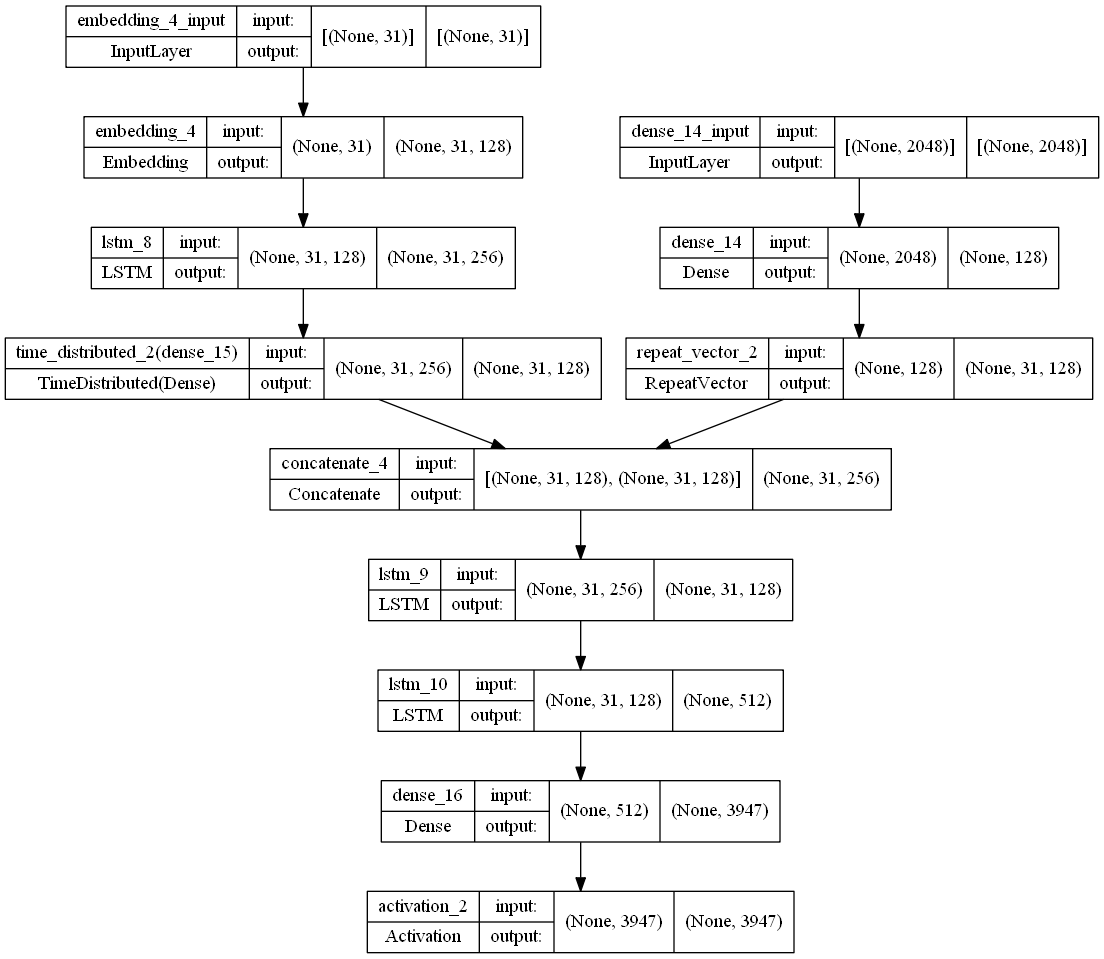

In [86]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

#model.load_weights("../input/model_weights.h5")
#opt = RMSprop(learning_rate=0.02)
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
training=model.fit([X, y_in], y_out, batch_size=512,validation_data=([X_val, y_in_val], y_out_val), epochs=20, verbose = 2)

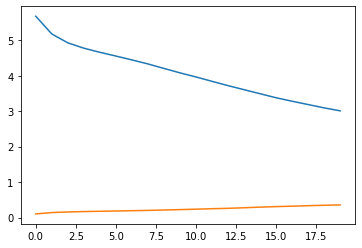

In [56]:
import matplotlib.pyplot as plt
plt.plot(training.history['loss'])
plt.plot(training.history['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               262272    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
Total params: 295,296
Trainable params: 295,296
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 31, 256)           1010432   
                                                                 
 dropout_3 (Dropout)      

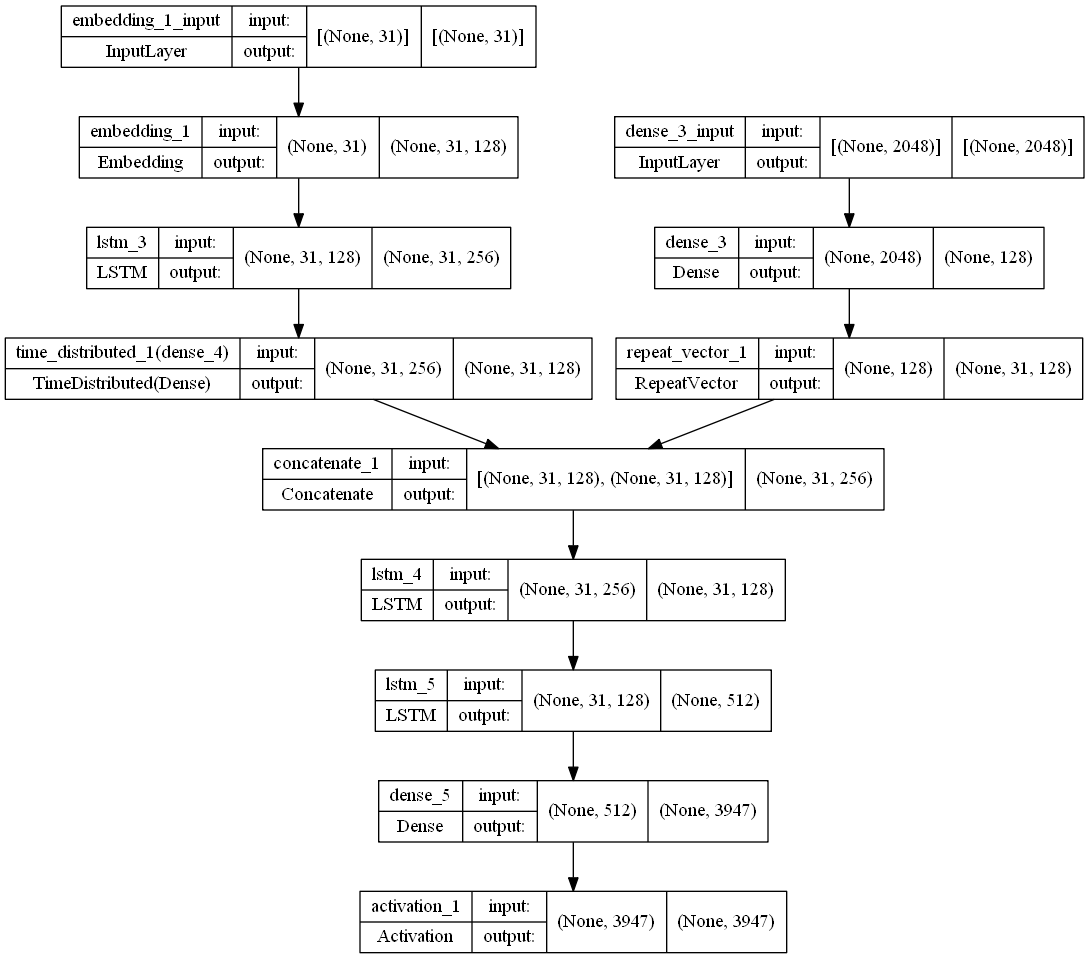

In [61]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model2 = Sequential()

image_model2.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model2.add(Dropout(0.5))
image_model2.add(Dense(256, activation='relu'))

image_model2.summary()

language_model2 = Sequential()

language_model2.add(Input(shape=(max_len,)))
language_model2.add(Embedding(vocab_size, 256, mask_zero=True))
language_model2.add(Dropout(0.5))
language_model2.add(LSTM(256))

language_model2.summary()

conca2 = Concatenate()([image_model2.output, language_model2.output])
x2 = Dense(256, activation='relu')(conca2)
out2 = Dense(vocab_size, activation='softmax')(x2)
model2 = Model(inputs=[image_model2.input, language_model2.input], outputs = out2)

#model.load_weights("../input/model_weights.h5")
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()
plot_model(model, to_file='model2.png', show_shapes=True)

In [76]:
training2=model2.fit([X, y_in], y_out, batch_size=512,validation_data=([X_val, y_in_val], y_out_val), epochs=20)

Epoch 1/20
152/152 [==============================] - 175s 1s/step - loss: 5.4854 - accuracy: 0.1338
Epoch 2/20
152/152 [==============================] - 164s 1s/step - loss: 4.6833 - accuracy: 0.1978
Epoch 3/20
152/152 [==============================] - 168s 1s/step - loss: 4.2680 - accuracy: 0.2326
Epoch 4/20
152/152 [==============================] - 165s 1s/step - loss: 4.0269 - accuracy: 0.2557
Epoch 5/20
152/152 [==============================] - 164s 1s/step - loss: 3.8604 - accuracy: 0.2666
Epoch 6/20
152/152 [==============================] - 174s 1s/step - loss: 3.7391 - accuracy: 0.2753
Epoch 7/20
152/152 [==============================] - 187s 1s/step - loss: 3.6295 - accuracy: 0.2829
Epoch 8/20
152/152 [==============================] - 169s 1s/step - loss: 3.5390 - accuracy: 0.2892
Epoch 9/20
152/152 [==============================] - 169s 1s/step - loss: 3.4610 - accuracy: 0.2959
Epoch 10/20
152/152 [==============================] - 177s 1s/step - loss: 3.3921 - accura

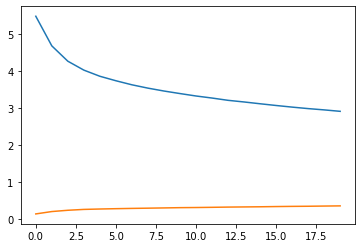

In [77]:
import matplotlib.pyplot as plt
plt.plot(training2.history['loss'])
plt.plot(training2.history['accuracy'])

In [78]:
inv_dict = {v:k for k, v in new_dict.items()}

In [79]:
model.save('model.h5')
model2.save('model2.h5')

In [80]:
model.save_weights('mine_model_weights.h5')
model2.save_weights('mine_model2_weights.h5')

In [81]:
np.save('vocab.npy', new_dict)

In [82]:
model = load_model('model.h5')

In [83]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    
    
    return test_img


(1, 2048)


0

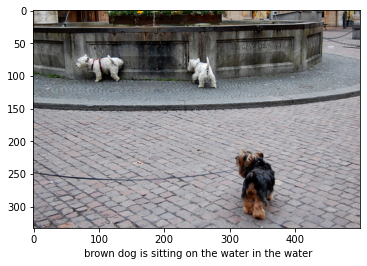

In [84]:
from gtts import gTTS
import os

for i in range(1):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    print(modele.predict(getImage(6999)).shape)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']
    
    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]
        if sampled_word == 'endofseq':
            break
        
        caption = caption + ' ' + sampled_word
              
       
        text_inp.append(sampled_word)
    
       
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption) 


mytext = caption
language = 'en'
myobj = gTTS(text=mytext, lang=language, slow=False)
myobj.save(f"{no}.mp3")
os.system(f"{no}.mp3")

In [86]:
from nltk.translate.bleu_score import corpus_bleu
from pickle import load

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load clean descriptions into memory
def load_clean_descriptions(filename):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# create list
		if image_id not in descriptions:
			descriptions[image_id] = list()
		# wrap description in tokens
		desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
		# store
		descriptions[image_id].append(desc)
	return descriptions



def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in clean.items():
		# generate description
		yhat = caption
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
    
clean = load_clean_descriptions('clean_descriptions.txt')
evaluate_model(model2, clean, images_features, captions_dict, max_len)

BLEU-1: 0.394400
BLEU-2: 0.217818
BLEU-3: 0.120238
BLEU-4: 0.033814
